<a href="https://colab.research.google.com/github/Anipro-10/Random-Walk-Simulation/blob/main/Random_Walk_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import math
import random

In [2]:
nsteps = 1000
x_pos = sys.maxsize
init_pos = (0,0,0)

In [3]:
def move_x(init_pos):
  movement = np.random.choice([-1,1])
  new_x = init_pos[0] + movement
  new_pos = (new_x, init_pos[1], init_pos[2])
  return new_pos

In [4]:
def move_y(init_pos):
  movement = np.random.choice([-1,1])
  new_y = init_pos[1] + movement
  new_pos = (init_pos[0], new_y, init_pos[2])
  return new_pos

In [5]:
def move_z(init_pos):
  movement = np.random.choice([-1,1])
  new_z = init_pos[2] + movement
  new_pos = (init_pos[0], init_pos[1], new_z)
  return new_pos

In [6]:
def simulate(nsteps, init_pos):
  positions = []
  positions.append((0,0,0))
  displacements = []
  for i in range(nsteps):
    choice = np.random.choice([0,1,2])
    if choice == 0:
      new_pos = move_x(init_pos)
    elif choice == 1:
      new_pos = move_y(init_pos)
    else:
      new_pos = move_z(init_pos)
    displacements.append(np.linalg.norm(np.array(new_pos) - np.array((0,0,0))))
    positions.append(new_pos)
    init_pos = new_pos
  return positions, displacements

In [7]:
positions, displacements = simulate(nsteps, init_pos)

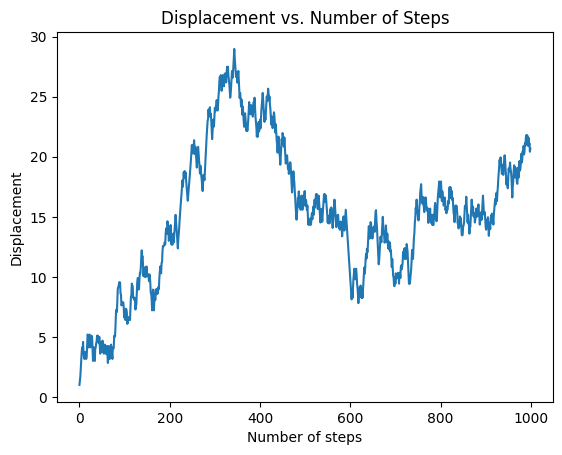

In [8]:

plt.plot(range(len(displacements)), displacements)
plt.xlabel("Number of steps")
plt.ylabel("Displacement")
plt.title("Displacement vs. Number of Steps")
plt.show()


In [9]:
displacements = np.array(displacements)
msd = np.cumsum(displacements**2)/np.arange(1,nsteps+1)

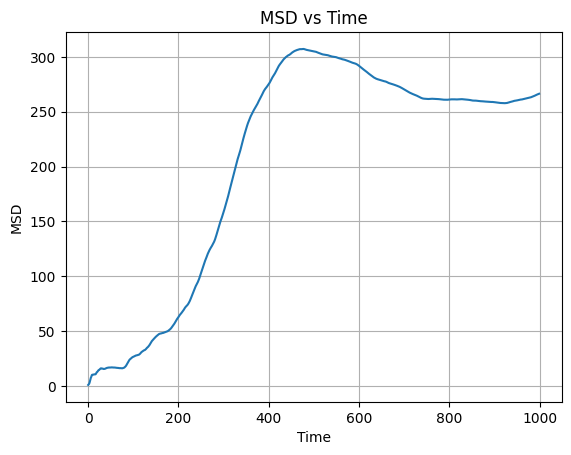

In [10]:
plt.plot(msd)
plt.xlabel("Time")
plt.ylabel("MSD")
plt.title("MSD vs Time")
plt.grid(True)
plt.show()


In [11]:
x_pos_history = []
y_pos_history = []
z_pos_history = []
for i in range(len(positions)):
  x_pos_history.append(positions[i][0])
  y_pos_history.append(positions[i][1])
  z_pos_history.append(positions[i][2])


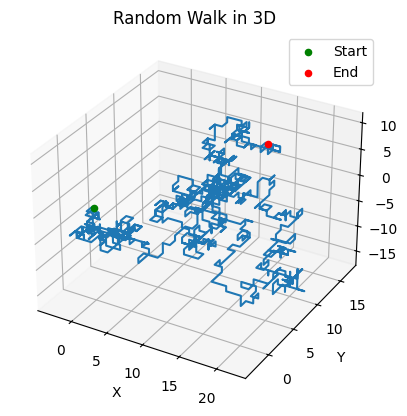

In [12]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(x_pos_history, y_pos_history, z_pos_history)
ax.scatter(x_pos_history[0], y_pos_history[0], z_pos_history[0], color='green', label='Start')
ax.scatter(x_pos_history[-1], y_pos_history[-1], z_pos_history[-1], color='red', label='End')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Random Walk in 3D')
plt.legend()
plt.show()
